In [1]:
import pandas as pd

df = pd.read_csv("../data/retail_sales_engineered.csv", parse_dates=["Date"])
df = df.sort_values("Date")

df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,...,Unemployment,IsHoliday_y,Year,Month,Week,DayOfWeek,Sales_Lag_1,Sales_Lag_2,Sales_MA_4,Holiday_Flag
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,5347.45,...,8.106,False,2010,2,5,4,0.0,0.0,NaN,0
277665,29,5,2010-02-05,15552.08,False,B,93638,24.36,2.788,5347.45,...,10.064,False,2010,2,5,4,0.0,0.0,NaN,0
277808,29,6,2010-02-05,3200.22,False,B,93638,24.36,2.788,5347.45,...,10.064,False,2010,2,5,4,0.0,0.0,NaN,0
277951,29,7,2010-02-05,10820.05,False,B,93638,24.36,2.788,5347.45,...,10.064,False,2010,2,5,4,0.0,0.0,NaN,0
278094,29,8,2010-02-05,20055.64,False,B,93638,24.36,2.788,5347.45,...,10.064,False,2010,2,5,4,0.0,0.0,NaN,0


In [4]:
# Aggregated Sales (Total Weekly Sales).
weekly_sales = df.groupby("Date")["Weekly_Sales"].sum().reset_index()

<Axes: xlabel='Date'>

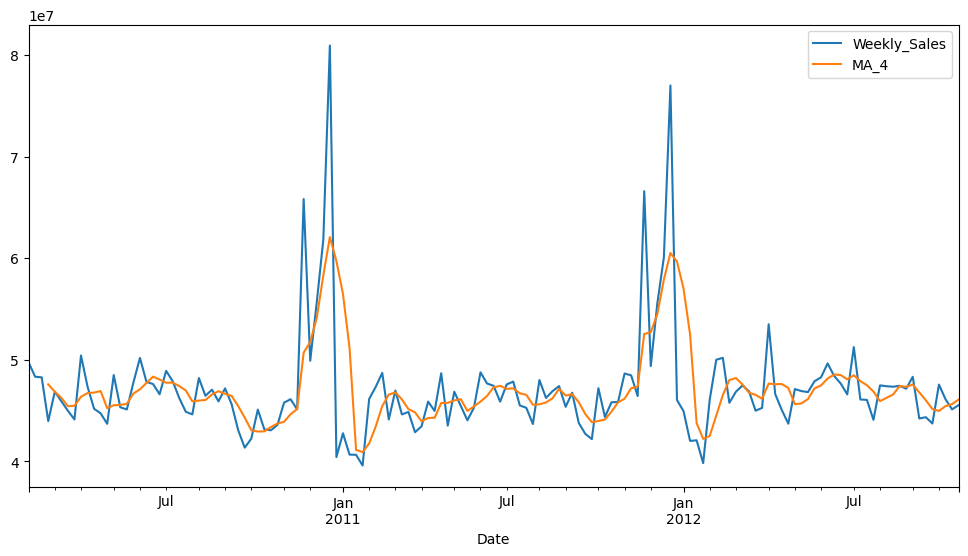

In [7]:
# Moving Average Forecast.
weekly_sales["MA_4"] = weekly_sales["Weekly_Sales"].rolling(window=4).mean()
weekly_sales.plot(x="Date", y=["Weekly_Sales", "MA_4"], figsize=(12,6))

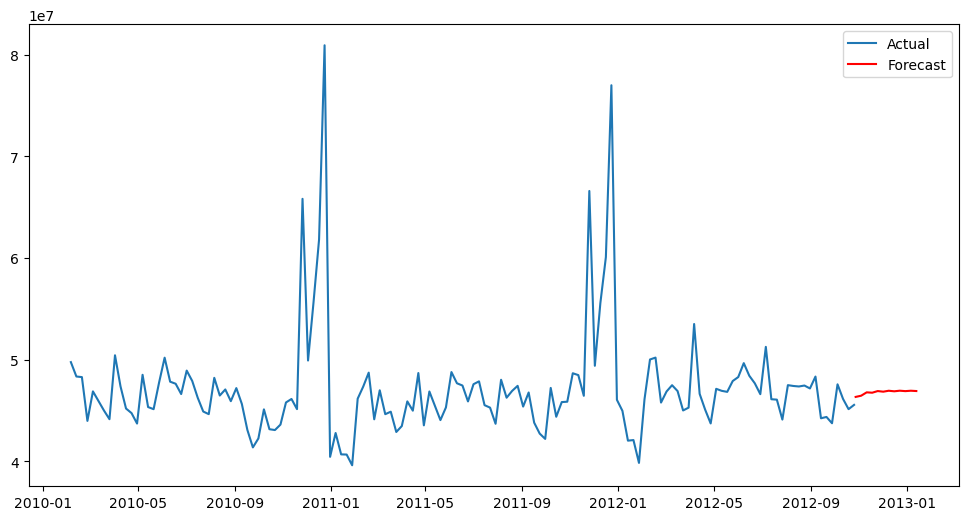

In [8]:
# ARIMA Model (AutoRegressive Integrated Moving Average).
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Fit ARIMA (simple version, no tuning yet)
model = ARIMA(weekly_sales["Weekly_Sales"], order=(2,1,2))
model_fit = model.fit()

# Forecast next 12 weeks
forecast = model_fit.forecast(steps=12)

plt.figure(figsize=(12,6))
plt.plot(weekly_sales["Date"], weekly_sales["Weekly_Sales"], label="Actual")
plt.plot(pd.date_range(weekly_sales["Date"].iloc[-1], periods=12, freq="W"), forecast, label="Forecast", color="red")
plt.legend()
plt.show()
